# ch01_02_DNN기초-텐서플로우를 이용한 모델링

---
* 날짜: 2022-06-27
* 이름: 고민수

## 학습내용
    - 텐서플로우를 이용해 모델을 구현한다.
    - 생성한 모델을 이용해 순전파 계산을 진행한다.
    - 텐서플로우로 모델을 구현하는 여러 방법에 대핼 배워본다. 

## 학습자료


- 케라스 창시자에게 배우는 딥러닝
- 텐서플로우 케라스 : https://www.tensorflow.org/?hl=ko


In [4]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow import keras
import tensorflow as tf

## DNN 기본 이해
---


### | 모델링 (1)


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-01.png?raw=true width=450>
</p>


#### **모델 구현**

In [4]:
# 모든 레이어는 케라스에 있다.

x = layers.Input(shape=(3), name="input_layer") 
y = layers.Dense(1, name="output_layer")(x)

model1 = models.Model(inputs=x, outputs=y, name="My_model")

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

In [2]:
# Output shape : 데이터 변환
# None : 데이터 개수
# Param : 파라미터 개수
model1.summary()

Model: "My_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


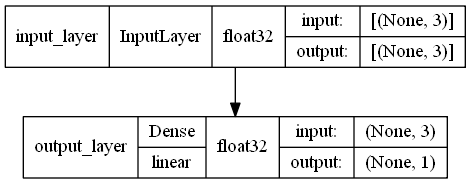

In [42]:
show = {"show_shapes":True, "show_dtype":True, "show_layer_names":True, "show_layer_activations":True}
keras.utils.plot_model(model1, **show)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-04.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [11]:
for layer in model1.layers:
    print(layer.name)
    print(layer.output.shape)

input_layer
(None, 3)
output_layer
(None, 1)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [12]:
"""
W : (3,1)
B : (1, )
"""

for param in model1.get_weights():
    print("shape = ",param.shape)
    print(param)
    print()

shape =  (3, 1)
[[ 0.4628917 ]
 [-0.13028252]
 [ 0.45152175]]

shape =  (1,)
[0.]



#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [13]:
import numpy as np
X = np.random.normal(size=(1,3))
print(X)
y_pred = model1.predict(X)
print(y_pred)

[[ 0.71392044 -0.04464374  0.21774439]]
[[0.43460047]]


### | 모델링 (2)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-02.png?raw=true width=450>
</p>


#### **모델 구현**

In [16]:
from tensorflow.keras import layers, models

x = layers.Input(shape=(3), name="input")
y = layers.Dense(3, name="output")(x)

M2 = models.Model(inputs=x, outputs=y, name="M2")

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "M2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 output (Dense)              (None, 3)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


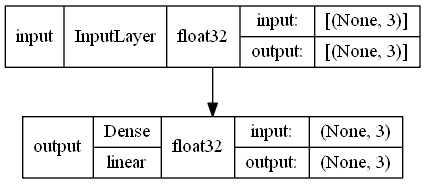

In [43]:
import tensorflow as tf
M2.summary()
tf.keras.utils.plot_model(M1, **show)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-05.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [18]:
for layer in M2.layers:
    print(layer.name)
    print(layer.output.shape)

input
(None, 3)
output
(None, 3)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [24]:
for param in M2.get_weights():
    print("shape = ",param.shape)
    print(param)
    print()

shape =  (3, 3)
[[-0.13254333 -0.19523811 -0.60893583]
 [-0.6455591   0.7279587  -0.49637175]
 [-0.1682117  -0.41097927  0.7039745 ]]

shape =  (3,)
[0. 0. 0.]



#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [34]:
import numpy as np
X = np.random.normal(size=(5,3))
print(X, "\n")
y_pred = M2.predict(X)
print(y_pred)

[[-0.82289018  1.47615136  0.10535045]
 [-0.73712591 -0.42309513  0.84691268]
 [-0.37312893  0.40491019  0.84056655]
 [ 1.50015459  0.81782579  0.18584866]
 [-0.74486991  0.32472203  0.56077735]] 

[[-0.8615955   1.19194    -0.1574685 ]
 [ 0.22837341 -0.51214427  1.2550797 ]
 [-0.35333082  0.02215141  0.617963  ]
 [-0.7580523   0.2260761  -1.1886109 ]
 [-0.20522903  0.15134333  0.68716806]]


### | 모델링 (3)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-03.png?raw=true width=550>
</p>


#### **모델 구현**

In [35]:
from tensorflow.keras import layers, models
import tensorflow as tf

x = layers.Input(shape=(3), name="input")
y = layers.Dense(3, name="D1")(x)
y = layers.Dense(2, name="output")(y)

M3 = models.Model(inputs =x, outputs=y, name="M3")

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "M3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 D1 (Dense)                  (None, 3)                 12        
                                                                 
 output (Dense)              (None, 2)                 8         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


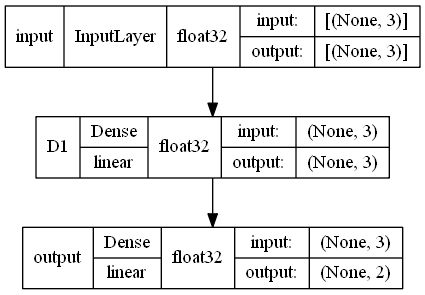

In [41]:
M3.summary()
tf.keras.utils.plot_model(M3, **show)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-06.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [50]:
for layer in M3.layers:
    print(layer.name)
    print(layer.output.shape)

input
(None, 3)
D1
(None, 3)
output
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [54]:
for param in M3.get_weights():
    print("params.shape = ", param.shape)
    print(param, "\n")

params.shape =  (3, 3)
[[ 0.22061825 -0.5637479   0.22770357]
 [-0.24293256  0.69401693  0.72448397]
 [-0.10305142  0.24686718 -0.38706708]] 

params.shape =  (3,)
[0. 0. 0.] 

params.shape =  (3, 2)
[[-0.6542418  -1.0437031 ]
 [ 0.06359935 -0.09885401]
 [ 0.49211252 -0.8979045 ]] 

params.shape =  (2,)
[0. 0.] 



#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [60]:
import numpy as np
X = np.random.normal(size=(1,3))
print("input=",X, "\n")
y_pred = M3.predict(X)
print("predict=",y_pred)

input= [[-2.40671733  0.35440539  0.10301768]] 

predict= [[0.35125035 0.7914829 ]]


### | 모델링 (4)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-12.png?raw=true width=820>

#### **모델 구현**

In [6]:
x = layers.Input(shape=(4,))
z1 = layers.Dense(8)(x)
z2 = layers.Dense(8)(z1)
y = layers.Dense(3)(z2)

model4 = models.Model(inputs=x, outputs=y, name="My_model_4")

model4.summary()

Model: "My_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


#### **파라미터** 



* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [9]:
"""
X : (N,4) N은 데이터 개수
Z1 : (N, 8)
Z2 : (N, 8)
Y : (N,3)
"""

for layer in model4.layers:
    print(layer.output.shape)

(None, 4)
(None, 8)
(None, 8)
(None, 3)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [19]:
X = np.random.normal(size=(1,4))
Y_pred = model4.predict(X)
print("X =", X)
print("Y_pred = ", Y_pred)
print("Y_pred.shape = ", Y_pred.shape)

X = [[-0.06419656  0.97364607 -0.86709545 -1.56367533]]
Y_pred =  [[ 0.3160481 -0.6352257 -0.2393616]]
Y_pred.shape =  (1, 3)


### | 병렬연산


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-13.png?raw=true width=820>



#### **순전파 계산**

Model4를 이용하여 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요. X의 샘플 개수는 10개 입니다.
* `np.random.normal`

In [20]:
# 실제 데이터 (1000~100000)개 중에 배치 단위로 계산이 진행됨, 배치 사이즈 8,16,32,64
X = np.random.normal(size=(10,4)) # batch의 개수가 10개
Y_pred = model4.predict(X)
print("X =", X)
print("Y_pred = ", Y_pred)
print("Y_pred.shape = ", Y_pred.shape)

X = [[-0.50772765  1.65916262  0.17975046 -1.03168336]
 [-0.56137761 -0.06124552  0.07327462 -0.23787975]
 [ 0.79228552  1.96680358  1.17057838  1.72528028]
 [ 0.23504772 -1.30123027 -0.8893585  -0.00397811]
 [-0.23262089  0.55235592  1.81944042  1.00283099]
 [-1.50151501 -1.8767765   0.21324574 -0.03357829]
 [ 0.87914172  0.46680383 -0.37487819 -0.38043137]
 [ 0.82614763  1.44411694 -1.00174472 -1.12908279]
 [-1.35637626  1.24464698  0.13070339 -1.07814903]
 [-1.17628494  0.89430876  0.28111349 -1.26230464]]
Y_pred =  [[ 0.51780325 -0.13946417 -0.73660266]
 [ 0.3921447  -0.6738366   0.08302869]
 [-0.87017614  3.3583946  -1.45876   ]
 [-0.18477562 -0.6322557   0.7428105 ]
 [ 0.06110817  0.8650068  -0.5219153 ]
 [ 0.96406925 -2.482869    1.0726671 ]
 [-0.45311028  0.6789721  -0.19181906]
 [-0.3430612   0.75394917 -0.5925699 ]
 [ 1.015901   -1.0822017  -0.4879989 ]
 [ 1.0057967  -1.389786   -0.2575219 ]]
Y_pred.shape =  (10, 3)


## 텐서플로우 - 모델을 만드는 세가지 방법
---

1. keras Sequential API
2. Keras Functional API
3. Model Class Subsclassing


아래 그림과 같은 모델을 텐서플로우를 이용해서 만들어 봅시다.

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel1.PNG?raw=true width=600>

### | Keras Functional API

* 모델 구현

In [27]:
def build_model():
    x = layers.Input(shape=(3,))
    l1 = layers.Dense(6)(x)
    l2 = layers.Dense(6)(l1)
    y = layers.Dense(1)(l2)
    model = models.Model(x, y)
    return model

model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_12 (Dense)            (None, 6)                 24        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


### | Keras Sequential API



* 모델 구현: `Sequential()`

In [29]:
def build_model2():
    model = keras.Sequential()
    model.add( layers.Input(shape=(3,1 )))
    model.add( layers.Dense(6) )
    model.add( layers.Dense(6) )
    model.add( layers.Dense(1) )
    return model

model = build_model2()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 3, 6)              12        
                                                                 
 dense_16 (Dense)            (None, 3, 6)              42        
                                                                 
 dense_17 (Dense)            (None, 3, 1)              7         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [30]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### | Model Class Subclassing

* 모델 구현

In [16]:
import tensorflow as tf
import numpy as np

In [9]:
class Model3(tf.keras.Model):
    def __init__(self):
        super(Model3, self).__init__()
        self._name = "Model3"
        self._input_shape=(3)
        self.dense1 = layers.Dense(6, name="dense1")
        self.dense2 = layers.Dense(6, name="dense2")
        self.dense3 = layers.Dense(1, name="dense3")
    
    def call(self, x):
        y = self.dense1(x)
        y = self.dense2(y)
        y = self.dense3(y)
        return y

* 모델 시각화

In [17]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  24        
                                                                 
 dense2 (Dense)              multiple                  42        
                                                                 
 dense3 (Dense)              multiple                  7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


### | 예제

세가지 방법을 이용해 아래 모델을 구현하세요.

#### **예제 01**

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel2.PNG?raw=true width=500>


* Keras Functional API


In [63]:
from tensorflow.keras import models, layers
x = layers.Input(4, name="input") # input (n,4)
y = layers.Dense(8, name="D1")(x) # param 40
y = layers.Dense(8, name="D2")(y) # param 72
y = layers.Dense(3, name="output")(y) # param 27

exM1 = models.Model(inputs=x, outputs=y, name="exM1") #  all_params = 40+72+27 = 139

exM1.summary()

Model: "exM1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 D1 (Dense)                  (None, 8)                 40        
                                                                 
 D2 (Dense)                  (None, 8)                 72        
                                                                 
 output (Dense)              (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


* keras Sequential API


In [64]:
exM1 = models.Sequential()
exM1.add( layers.Input(shape=(4)) )
exM1.add( layers.Dense(8) )
exM1.add( layers.Dense(8) )
exM1.add( layers.Dense(3) )

exM1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


* Model Class Subsclassing

In [74]:
class exM1(tf.keras.Model):
    def __init__(self):
        super(exM1, self).__init__()
        self._name = "exM1"
        self._input_shape = 4
        self.D1 = layers.Dense(8, name="D1")
        self.D2 = layers.Dense(8, name="D2")
        self.D3 = layers.Dense(3, name="D3")
    
    def call(self, x):
        y = self.D1(x)
        y = self.D2(y)
        y = self.D3(y)
        return y

In [75]:
exM1 = exM1()
exM1(np.array([[1,3,4,2]]))
exM1.summary()

Model: "exM1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  multiple                  40        
                                                                 
 D2 (Dense)                  multiple                  72        
                                                                 
 D3 (Dense)                  multiple                  27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


#### **예제 02**




<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel3.PNG?raw=true width=700>


* Keras Functional API


Model: "exM2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 D1 (Dense)                  (None, 4)                 16        
                                                                 
 D2 (Dense)                  (None, 8)                 40        
                                                                 
 D3 (Dense)                  (None, 4)                 36        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


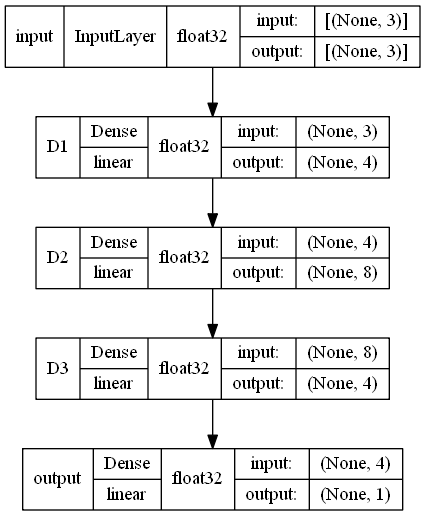

In [98]:
x = layers.Input(shape=(3), name="input") # input shape = (N,3)
y = layers.Dense(4, name="D1")(x) # param = 16
y = layers.Dense(8, name="D2")(y) # param = 40
y = layers.Dense(4, name="D3")(y) # param = 36
y = layers.Dense(1, name="output")(y) # param = 5

exM2 = models.Model(inputs=x, outputs=y, name="exM2") # all_param = 16+40+36+5 = 97
exM2.summary()
tf.keras.utils.plot_model(exM2, **show)

* keras Sequential API


Model: "exM2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  (None, 4)                 16        
                                                                 
 D2 (Dense)                  (None, 8)                 40        
                                                                 
 D3 (Dense)                  (None, 4)                 36        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


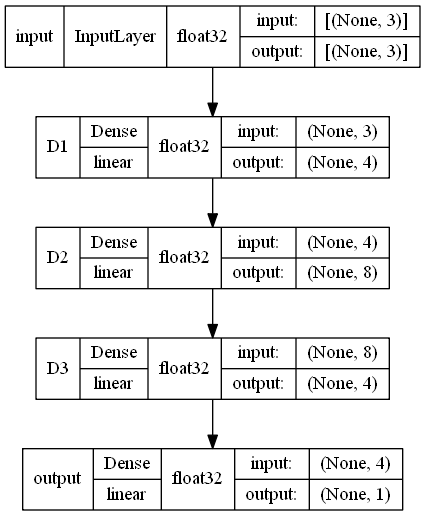

In [97]:
exM2 = models.Sequential(name="exM2")
exM2.add( layers.Input(shape=(3), name="input") )
exM2.add( layers.Dense(4, name="D1") )
exM2.add( layers.Dense(8, name="D2") )
exM2.add( layers.Dense(4, name="D3") )
exM2.add( layers.Dense(1, name="output") )

exM2.summary()
tf.keras.utils.plot_model(exM2, **show)

* Model Class Subsclassing



In [ ]:
class exM1(tf.keras.Model):
    def __init__(self):
        super(exM1, self).__init__()
        self._name = "exM1"
        self._input_shape = 4
        self.D1 = layers.Dense(8, name="D1")
        self.D2 = layers.Dense(8, name="D2")
        self.D3 = layers.Dense(3, name="D3")
    
    def call(self, x):
        y = self.D1(x)
        y = self.D2(y)
        y = self.D3(y)
        return y

In [114]:
class exM2(tf.keras.Model):
    def __init__(self):
        super(exM2, self).__init__()
        self._name = "exM2"
        self._input_shape = 3
        self.D1 = layers.Dense(4, name="D1")
        self.D2 = layers.Dense(8, name="D2")
        self.D3 = layers.Dense(4, name="D3")
        self.D4 = layers.Dense(1, name="output")
        
    def call(self, x):
        y = self.D1(x)
        y = self.D2(y)
        y = self.D3(y)
        y = self.D4(y)
        return y

In [115]:
exM2 = exM2()
exM2( np.array([[1,2,1]]) )
exM2.summary()

Model: "exM2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  multiple                  16        
                                                                 
 D2 (Dense)                  multiple                  40        
                                                                 
 D3 (Dense)                  multiple                  36        
                                                                 
 output (Dense)              multiple                  5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
